In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
bank = pd.read_csv("BankChurners.csv")
bank.head()


FileNotFoundError: [Errno 2] No such file or directory: 'BankChurners.csv'

In [ ]:
#Check if dataset has any missing datapoints
bank.dropna().shape

(10127, 21)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

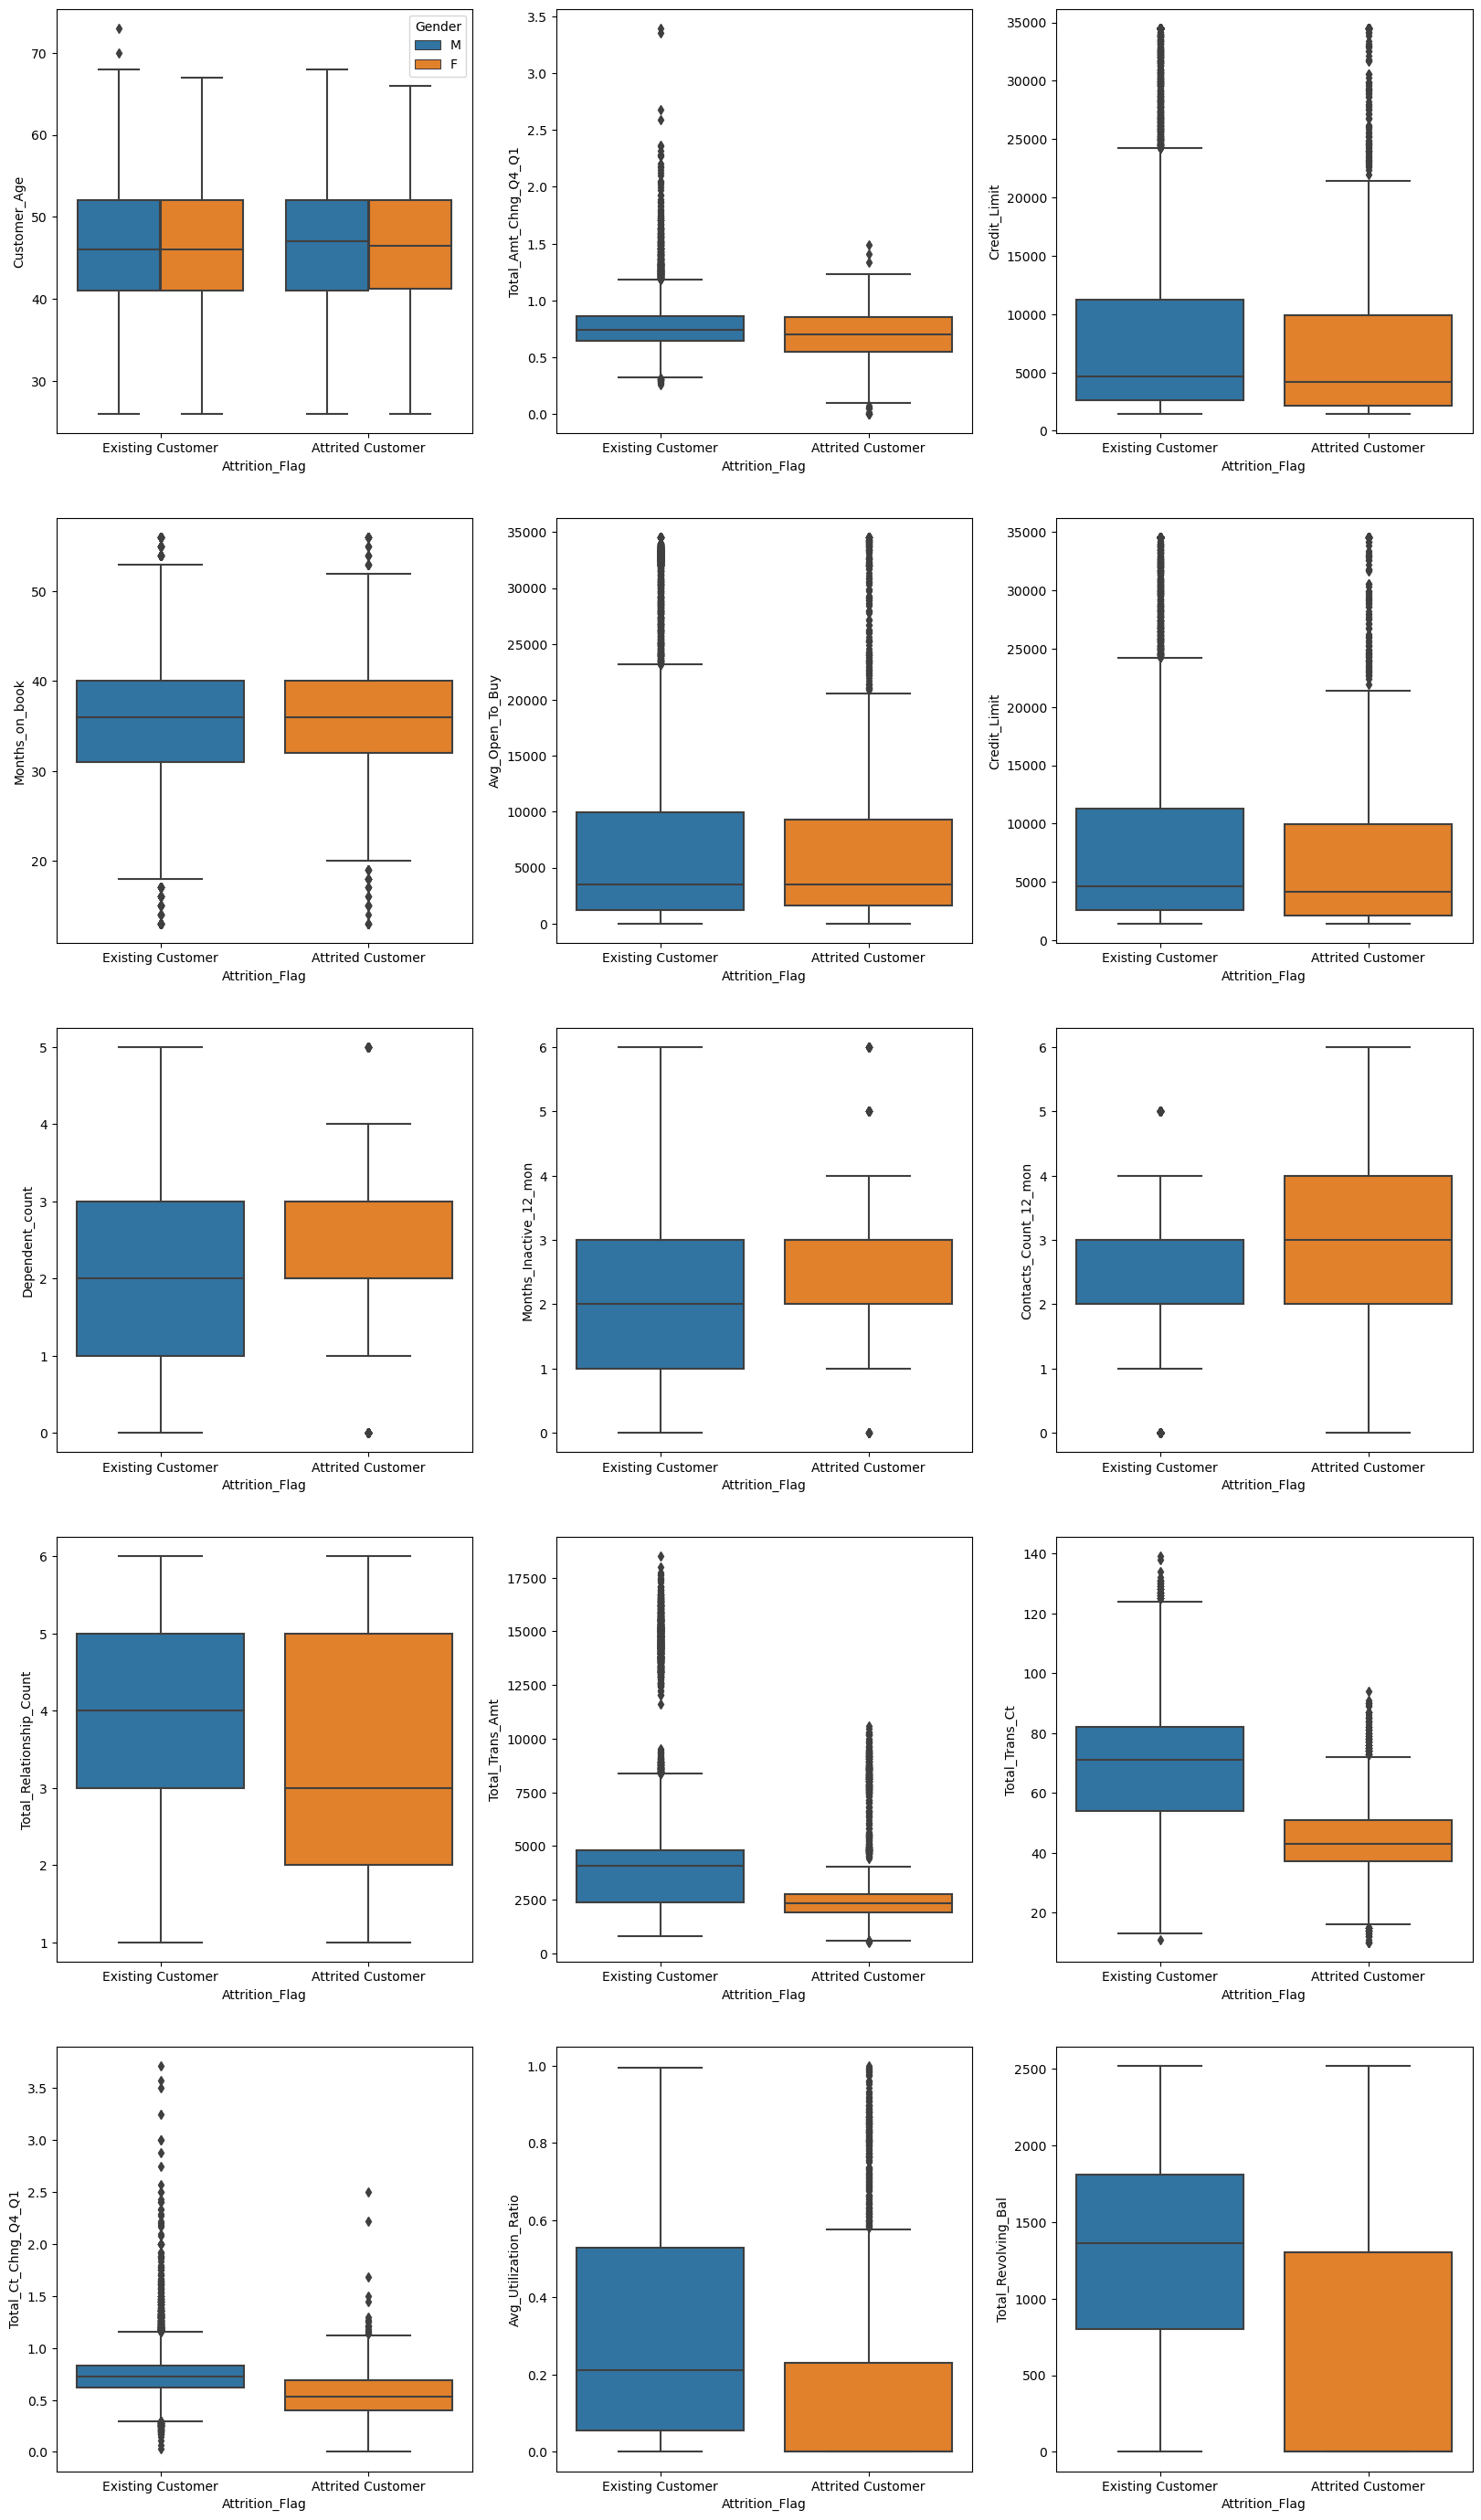

In [ ]:
#comparing existing and attrited customers for numerical variables

plt.figure(figsize=(20,35))
plt.subplot(5,3,1)
sns.boxplot(data=bank, x='Attrition_Flag', y='Customer_Age', hue="Gender")
plt.subplot(5,3,2)
sns.boxplot(data=bank, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.subplot(5,3,3)
sns.boxplot(data=bank, x='Attrition_Flag', y="Credit_Limit")
plt.subplot(5,3,4)
sns.boxplot(data=bank, x='Attrition_Flag', y='Months_on_book')
plt.subplot(5,3,5)
sns.boxplot(data=bank, x='Attrition_Flag', y="Avg_Open_To_Buy")
plt.subplot(5,3,6)
sns.boxplot(data=bank, x='Attrition_Flag', y='Credit_Limit')
plt.subplot(5,3,7)
sns.boxplot(data=bank, x='Attrition_Flag', y="Dependent_count")
plt.subplot(5,3,8)
sns.boxplot(data=bank, x='Attrition_Flag', y="Months_Inactive_12_mon")
plt.subplot(5,3,9)
sns.boxplot(data=bank, x='Attrition_Flag', y="Contacts_Count_12_mon")
plt.subplot(5,3,10)
sns.boxplot(data=bank, x='Attrition_Flag', y="Total_Relationship_Count")
plt.subplot(5,3,11)
sns.boxplot(data=bank, x='Attrition_Flag', y="Total_Trans_Amt")
plt.subplot(5,3,12)
sns.boxplot(data=bank, x='Attrition_Flag', y="Total_Trans_Ct")
plt.subplot(5,3,13)
sns.boxplot(data=bank, x='Attrition_Flag', y="Total_Ct_Chng_Q4_Q1")
plt.subplot(5,3,14)
sns.boxplot(data=bank, x='Attrition_Flag', y="Avg_Utilization_Ratio")
plt.subplot(5,3,15)
sns.boxplot(data=bank, x='Attrition_Flag', y="Total_Revolving_Bal")


Text(0.5, 1.0, 'Attirtion Flag in Bank Customers')

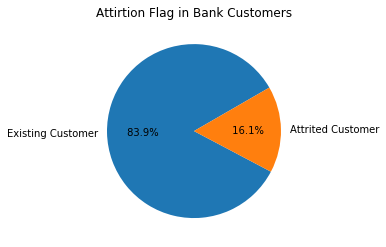

In [ ]:
#Calculate percentage of attrited customers
att_count = bank.Attrition_Flag.value_counts().reset_index()
att_count.columns=["Attrition_Flag", "Counts"]

fig, ax = plt.subplots()
ax.pie(att_count.Counts, labels = att_count.Attrition_Flag, autopct ='% .1f%%', startangle = 30)
ax.set_title('Attirtion Flag in Bank Customers')


In [ ]:
#Dummy variable for Customer Attrition
bank2 = bank.copy()

att = pd.get_dummies(bank2['Attrition_Flag'], drop_first=True)
bank2=bank2.drop('Attrition_Flag', axis=1)

bank2=bank2.merge(att, how='left', left_index=True, right_index=True)
bank2.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Existing Customer
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,0.046430
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,-0.018203
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,-0.018991
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,-0.013687
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,0.150005
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,-0.152449
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,-0.204491
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,0.023873
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,0.263053
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,0.000285


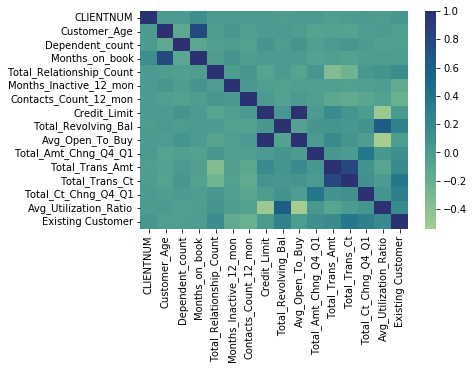

In [ ]:
sns.heatmap(bank2.corr(),cmap='crest')

In [ ]:
stay = bank2[bank2['Existing Customer']== 1]
churn = bank2[bank2['Existing Customer'] == 0]

C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Attrited Customer Age Distribution')

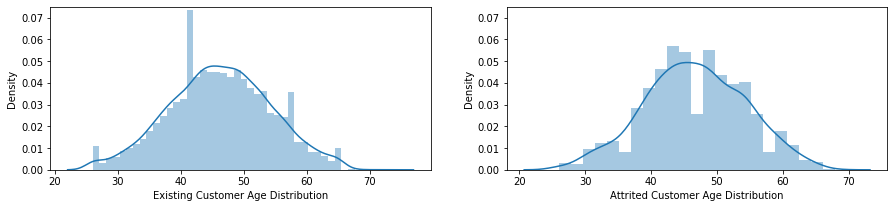

In [ ]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(stay.Customer_Age)
plt.ylim(0,0.075)
plt.xlabel('Existing Customer Age Distribution')

plt.subplot(1,2,2)
sns.distplot(churn.Customer_Age)
plt.ylim(0,0.075)
plt.xlabel('Attrited Customer Age Distribution')

In [ ]:
existing_age = bank[bank.Attrition_Flag=='Existing Customer'].Customer_Age.sort_values()
np.percentile(existing_age, [20,50,80])

churn_age = bank[bank.Attrition_Flag=='Attrited Customer'].Customer_Age.sort_values()
np.percentile(churn_age, [20,50,80])

array([40., 47., 54.])

Text(0.5, 1.0, 'Customer Gender')

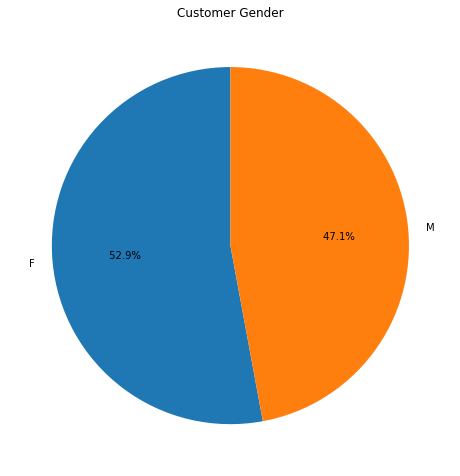

In [ ]:
gender = bank.Gender.value_counts().reset_index()
gender.columns=['Gender', 'Counts']

fig, ax = plt.subplots(figsize=(8,10))
ax.pie(gender.Counts, labels = gender.Gender, autopct ='% .1f%%', startangle = 90)
ax.set_title('Customer Gender')


Text(0.5, 1.0, 'Education Level of Customers')

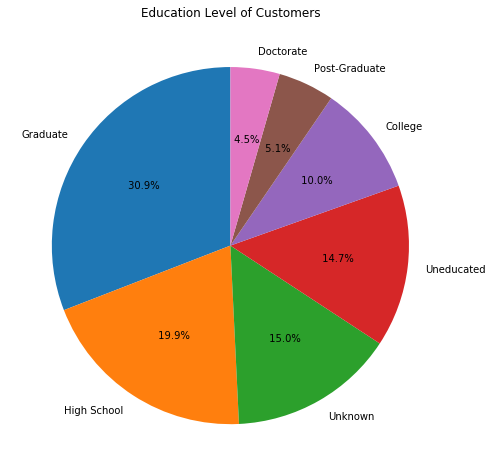

In [ ]:
ed_level = bank.Education_Level.value_counts().reset_index()
ed_level.columns=["Education_Level", "Counts"]

fig, ax = plt.subplots(figsize=(8,10))
ax.pie(ed_level.Counts, labels = ed_level.Education_Level, autopct ='% .1f%%', startangle = 90)
ax.set_title('Education Level of Customers')



  Education_Level  Existing Customer  Churn_Customer
0         College           0.847976        0.152024
1       Doctorate           0.789357        0.210643
2        Graduate           0.844309        0.155691
3     High School           0.847988        0.152012
4   Post-Graduate           0.821705        0.178295
5      Uneducated           0.840619        0.159381
6         Unknown           0.831468        0.168532


Text(0, 0.5, 'Churn Rate')

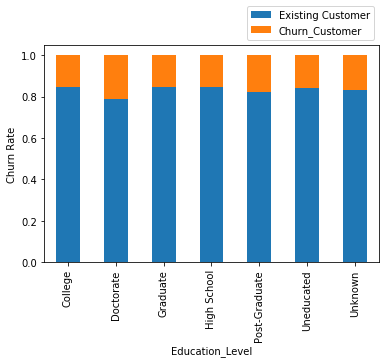

In [ ]:

education = bank2.pivot_table('Existing Customer', ['Education_Level']).reset_index()
education['Churn_Customer']= 1-education['Existing Customer']
print(education)

education.plot.bar(x='Education_Level', y=['Existing Customer', 'Churn_Customer'], stacked=True)
plt.legend(loc='upper right', bbox_to_anchor = (1, 1.2))
plt.ylabel("Churn Rate")



C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


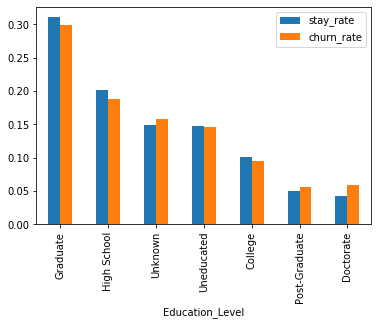

In [ ]:
stay_ed = stay.Education_Level.value_counts()
churn_ed = churn.Education_Level.value_counts()

education2 = pd.concat([stay_ed, churn_ed], axis=1).reset_index()
education2.columns = ['Education_Level','Stay', 'Churn']

education2['stay_rate']=education2.Stay/(education2.Stay.sum())
education2['churn_rate']=education2.Churn/(education2.Churn.sum())

education2 = education2.drop(['Churn', 'Stay'], axis =1)
education2 = education2.sort_values('stay_rate', ascending=False)

education2.plot(x='Education_Level', kind='bar', stacked=False)


Text(0.5, 1.0, 'Marital Status of Customers')

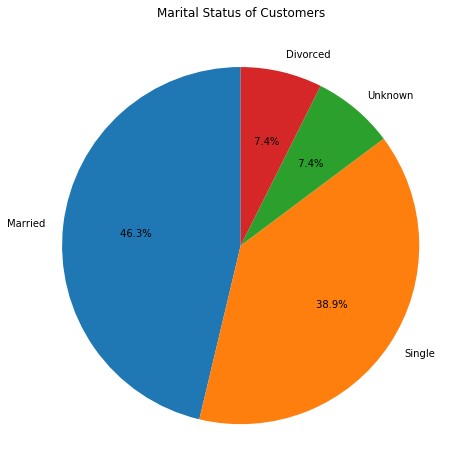

In [ ]:
rship_type = bank.Marital_Status.value_counts().reset_index()
rship_type.columns=["Marital_Status", "Counts"]

fig, ax = plt.subplots(figsize=(8,10))
ax.pie(rship_type.Counts, labels = rship_type.Marital_Status, autopct ='% .1f%%', startangle = 90)
ax.set_title('Marital Status of Customers')


C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


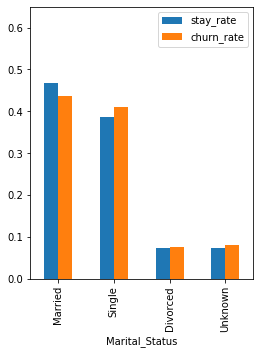

In [ ]:
stay_rship = stay.Marital_Status.value_counts()
churn_rship = churn.Marital_Status.value_counts()

rship = pd.concat([stay_rship, churn_rship], axis=1).reset_index()
rship.columns = ['Marital_Status','Stay', 'Churn']

rship['stay_rate']=rship.Stay/(rship.Stay.sum())
rship['churn_rate']=rship.Churn/(rship.Churn.sum())

rship = rship.drop(['Churn', 'Stay'], axis =1)
rship = rship.sort_values('stay_rate', ascending=False)


rship.plot(x='Marital_Status', kind='bar', stacked=False, ylim=(0,0.65), figsize=(4,5))



  Marital_Status  Existing Customer  Churn_Customer
0       Divorced           0.838235        0.161765
1        Married           0.848731        0.151269
2         Single           0.830586        0.169414
3        Unknown           0.827770        0.172230


Text(0, 0.5, 'Churn Rate')

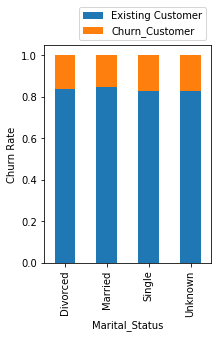

In [ ]:
rship = bank2.pivot_table('Existing Customer', ['Marital_Status']).reset_index()
rship['Churn_Customer']= 1-rship['Existing Customer']
print(rship)

rship.plot.bar(x='Marital_Status', y=['Existing Customer', 'Churn_Customer'], stacked=True, figsize=(3,4))
plt.legend(loc='upper right', bbox_to_anchor = (1, 1.2))
plt.ylabel("Churn Rate")



Text(0.5, 1.0, 'Income Category of Customers')

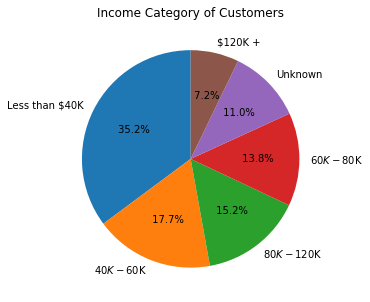

In [ ]:
income_level = bank.Income_Category.value_counts().reset_index()
income_level.columns=["Income_Category", "Counts"]

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(income_level.Counts, labels = income_level.Income_Category, autopct ='% .1f%%', startangle = 90)
ax.set_title('Income Category of Customers')


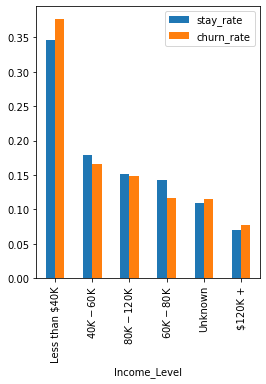

In [ ]:
stay_income = stay.Income_Category.value_counts()
churn_income = churn.Income_Category.value_counts()

income = pd.concat([stay_income, churn_income], axis=1).reset_index()
income.columns = ['Income_Level','Stay', 'Churn']

income['stay_rate']=income.Stay/(income.Stay.sum())
income['churn_rate']=income.Churn/(income.Churn.sum())

income = income.drop(['Churn', 'Stay'], axis =1)

income.plot(x='Income_Level', kind='bar', stacked=False, figsize=(4,5))


  Income_Category  Existing Customer  Churn_Customer
0         $120K +           0.826685        0.173315
1     $40K - $60K           0.848603        0.151397
2     $60K - $80K           0.865193        0.134807
3    $80K - $120K           0.842345        0.157655
4  Less than $40K           0.828138        0.171862
5         Unknown           0.831835        0.168165


Text(0, 0.5, 'Churn Rate')

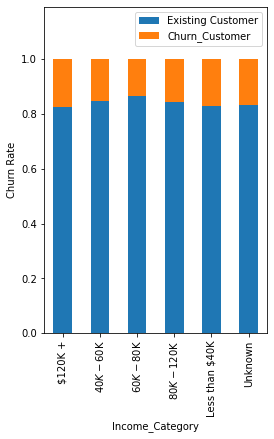

In [ ]:
income2 = bank2.pivot_table('Existing Customer', ['Income_Category']).reset_index()
income2['Churn_Customer']= 1-income2['Existing Customer']
print (income2)

income2.plot.bar(x='Income_Category', y=['Existing Customer', 'Churn_Customer'], stacked=True, figsize=(4,6), ylim=(0,1.19))
plt.ylabel("Churn Rate")


Text(0.5, 1.0, 'Card Category of Customers')

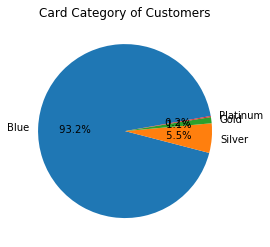

In [ ]:
card_type = bank.Card_Category.value_counts().reset_index()
card_type.columns=["Card_Category", "Counts"]

fig, ax = plt.subplots()
ax.pie(card_type.Counts, labels = card_type.Card_Category, autopct ='% .1f%%', startangle = 10)
ax.set_title('Card Category of Customers')


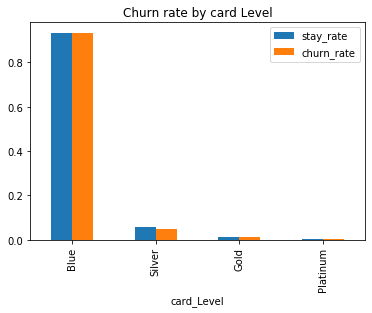

In [ ]:
stay_card = stay.Card_Category.value_counts()
churn_card = churn.Card_Category.value_counts()

card = pd.concat([stay_card, churn_card], axis=1).reset_index()
card.columns = ['card_Level','Stay', 'Churn']

card['stay_rate']=card.Stay/(card.Stay.sum())
card['churn_rate']=card.Churn/(card.Churn.sum())

card = card.drop(['Churn', 'Stay'], axis =1)

card.plot(x='card_Level', kind='bar', stacked=False, title='Churn rate by card Level')

  Card_Category  Existing Customer  Churn_Customer
0          Blue           0.839021        0.160979
1          Gold           0.818966        0.181034
2      Platinum           0.750000        0.250000
3        Silver           0.852252        0.147748


Text(0, 0.5, 'Churn Rate')

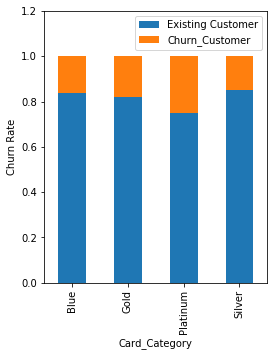

In [ ]:
card = bank2.pivot_table('Existing Customer', ['Card_Category']).reset_index()
card['Churn_Customer']= 1-card['Existing Customer']
print (card)

card.plot.bar(x='Card_Category', y=['Existing Customer', 'Churn_Customer'], stacked=True, figsize= (4,5), ylim=(0,1.2))
plt.ylabel("Churn Rate")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 

def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)
    auc = roc_auc_score(Y_true, y_pred)

    return acc, precision, recall, f1score, auc

def display_metrics(classifierName, Y_pred, Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred, Y_true)

    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("AUC: "+str(auc))
    print ("______________________________________________")
    print ("")


In [ ]:
X = bank2[['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Dependent_count',
       'Total_Trans_Amt','Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1']]
y= bank2['Existing Customer']

In [ ]:
#Logistic Regression

import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model_lg = LogisticRegression().fit(X_train, y_train)
y_pred=model_lg.predict(X_test)

confusion_matrix_results = confusion_matrix(y_pred, y_test)

print('confusion matrix: \n', confusion_matrix_results)
display_metrics('Logistic Regression', y_pred, y_test)


confusion matrix: 
 [[ 230   84]
 [ 272 2453]]
______________________________________________
Model: Logistic Regression
Accuracy: 0.882856202698256
Precision: 0.9001834862385321
Recall: 0.9668900275916437
F1-score: 0.9323451159255036
AUC: 0.7125286791344673
______________________________________________



C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
X = sm.add_constant(X)

model_lg2 = sm.Logit(y, X)
model_lg2.fit().summary()


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Existing Customer   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10117
Method:                           MLE   Df Model:                            9
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                     inf
Time:                        16:53:15   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.5367      0.246    -18.467      0.000      -5.018      -4.055
Total_Relationship_Count     0.4577      0.027     16.926      0.000       0.405       0.511
Months_Inactive_12_mon      -0.4894      0.037    -13.257      0.000      -0.562      -0.417
Contacts_Count_12_mon       -0.4909      0.035    -13.834      0.000      -0.560      -0.421
Total_Revolving_Bal          0.0011   6.31e-05     17.078      0.000       0.001       0.001
Dependent_count             -0.1474      0.029     -5.100      0.000      -0.204      -0.091
Total_Trans_Amt             -0.0004   2.19e-05    -20.464      0.000      -0.000      -0.000
Total_Trans_Ct               0.1102      0.004     31.160      0.000       0.103       0.117
Avg_Utilization_Ratio       -0.4165      0.197     -2.115      0.034      -0.802      -0.031
Total_Ct_Chng_Q4_Q1          2.9940      0.174     17.191      0.000       2.653       3.335
============================================================================================
"""

In [ ]:
#Decision Tree
# max depth of 10 has the best results

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif

depth = [5, 10, 15, 20]
for i in depth:
    model_dt = DecisionTreeClassifier(criterion='entropy', random_state=101, max_depth=i)
    model_dt.fit(X_train, y_train)
    
    y_pred = model_dt.predict(X_test)
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    
    display_metrics('Decision Tree', y_pred, y_test)


______________________________________________
Model: Decision Tree
Accuracy: 0.9223428759460349
Precision: 0.9343148357870895
Recall: 0.9755616870319275
F1-score: 0.9544928654068645
AUC: 0.8144740706075972
______________________________________________

______________________________________________
Model: Decision Tree
Accuracy: 0.939453767686739
Precision: 0.9641025641025641
Recall: 0.9633425305478912
F1-score: 0.9637223974763407
AUC: 0.8910338150747424
______________________________________________

______________________________________________
Model: Decision Tree
Accuracy: 0.9361632115827575
Precision: 0.9661758853959411
Recall: 0.9570358691367757
F1-score: 0.9615841584158416
AUC: 0.8938565799867146
______________________________________________

______________________________________________
Model: Decision Tree
Accuracy: 0.933201711089174
Precision: 0.9627279936558287
Recall: 0.9570358691367757
F1-score: 0.9598734927851353
AUC: 0.8848924365604197
______________________________

Feature ranking:
                    Feature Total Reduction of Criterion
0            Total_Trans_Ct                     0.342285
1           Total_Trans_Amt                     0.205624
2       Total_Revolving_Bal                      0.17187
3       Total_Ct_Chng_Q4_Q1                    0.0995321
4  Total_Relationship_Count                    0.0886179
5    Months_Inactive_12_mon                    0.0284325
6     Avg_Utilization_Ratio                     0.024524
7           Dependent_count                     0.023832
8     Contacts_Count_12_mon                     0.015282


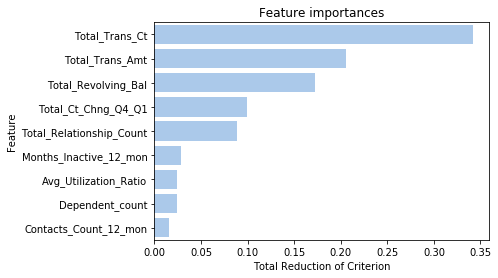

In [ ]:
importances = model_dt.feature_importances_  # extract importance metrics 
indices = np.argsort(importances)[::-1] # sorts the rows 

print("Feature ranking:")

feature_names = X_train.columns 
fi = pd.DataFrame([feature_names[indices[0:10]], importances[indices][0:10]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

print(fi)

plt.figure()
plt.title("Feature importances")

sns.set_color_codes("pastel")
sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, color="b")



In [ ]:
#Random Forest
#n_estimators of 100 has the best AUC

num_trees=[10,50,100,250,500]
for i in num_trees:
    model_rf = RandomForestClassifier(n_estimators=i, random_state=101)
    model_rf.fit(X_train, y_train)
    
    y_pred = model_rf.predict(X_test)
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    
    display_metrics('Random Forest', y_pred, y_test)


______________________________________________
Model: Random Forest
Accuracy: 0.9519578808818691
Precision: 0.9723429474516001
Recall: 0.9700433582972015
F1-score: 0.9711917916337807
AUC: 0.9153005636107521
______________________________________________

______________________________________________
Model: Random Forest
Accuracy: 0.9588680487002303
Precision: 0.9707259953161592
Recall: 0.980291683090264
F1-score: 0.975485389292018
AUC: 0.9154446463260086
______________________________________________

______________________________________________
Model: Random Forest
Accuracy: 0.9608423823626193
Precision: 0.972265625
Recall: 0.9810800157666535
F1-score: 0.9766529330979006
AUC: 0.9198228764092232
______________________________________________

______________________________________________
Model: Random Forest
Accuracy: 0.9608423823626193
Precision: 0.9704280155642023
Recall: 0.9830508474576272
F1-score: 0.9766986489132563
AUC: 0.9158282125734352
_____________________________________

Feature ranking:


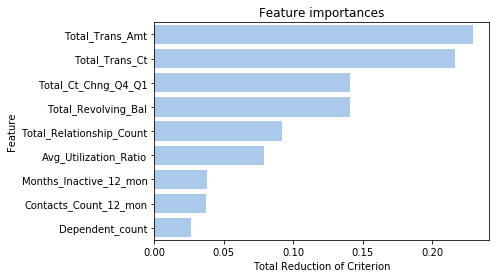

In [ ]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:10]], importances[indices][0:10]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

# Plot the feature importances 
plt.figure()
plt.title("Feature importances")

sns.set_color_codes("pastel")
sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, color="b")


In [ ]:
#for SVM and Naive Bayes
#higher c values have the best evaluation metrics
#smaller gamma values have the best evaluation metrics
#selected c=5, and gamma= 0.001

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 

cs = [0.1, 1, 5, 10, 50]
gammas = [0.001, 0.05, 0.5]

for i in cs: 
    for j in gammas: 
        model_svm = SVC(C=i, gamma=j, random_state=101)
        model_svm.fit(X_train, y_train)
        
        y_pred = model_svm.predict(X_test)
        
        acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test) 
        display_metrics('SVM', y_pred, y_test)


______________________________________________
Model: SVM
Accuracy: 0.8627838104639685
Precision: 0.8660220994475138
Recall: 0.9885691761923532
F1-score: 0.9232468249585865
AUC: 0.6078304048292443
______________________________________________

______________________________________________
Model: SVM
Accuracy: 0.834814083580125
Precision: 0.834814083580125
Recall: 1.0
F1-score: 0.9099713055954088
AUC: 0.5
______________________________________________

______________________________________________
Model: SVM
Accuracy: 0.834814083580125
Precision: 0.834814083580125
Recall: 1.0
F1-score: 0.9099713055954088
AUC: 0.5
______________________________________________

______________________________________________
Model: SVM
Accuracy: 0.8897663705166173
Precision: 0.902706656912948
Recall: 0.9728025226645645
F1-score: 0.9364446974008727
AUC: 0.7214610222884575
______________________________________________

______________________________________________
Model: SVM
Accuracy: 0.845014807502467

In [ ]:
model_nb = GaussianNB().fit(X_train, y_train)
y_pred = model_nb.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Naive Bayes', y_pred, y_test)



confusion matrix: 
 [[ 317  185]
 [ 161 2376]]
______________________________________________
Model: Naive Bayes
Accuracy: 0.8861467588022376
Precision: 0.9277625927372121
Recall: 0.9365392195506503
F1-score: 0.9321302471557473
AUC: 0.7840066615681539
______________________________________________



In [ ]:
#Ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

num_trees=[5, 10, 20]
for i in num_trees:
    model_bg = BaggingClassifier(base_estimator=SVC(gamma = 'auto'), n_estimators=i, random_state=101).fit(X_train, y_train)
    y_pred = model_bg.predict(X_test)
    
    display_metrics('Bagging Ensemble', y_pred, y_test)


______________________________________________
Model: Bagging Ensemble
Accuracy: 0.8354721948009214
Precision: 0.8353638459005598
Recall: 1.0
F1-score: 0.9102978112665948
AUC: 0.50199203187251
______________________________________________

______________________________________________
Model: Bagging Ensemble
Accuracy: 0.8354721948009214
Precision: 0.8353638459005598
Recall: 1.0
F1-score: 0.9102978112665948
AUC: 0.50199203187251
______________________________________________

______________________________________________
Model: Bagging Ensemble
Accuracy: 0.8354721948009214
Precision: 0.8353638459005598
Recall: 1.0
F1-score: 0.9102978112665948
AUC: 0.50199203187251
______________________________________________



In [ ]:
#Adaboost
num_trees=[5, 10, 20, 50, 100]
for i in num_trees:
    model_ada = AdaBoostClassifier(n_estimators=i, random_state=101).fit(X_train, y_train)
    y_pred = model_ada.predict(X_test)
    display_metrics('AdaBoost', y_pred, y_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)
print('confusion matrix: \n', confusion_matrix_results)



______________________________________________
Model: AdaBoost
Accuracy: 0.8950312602829879
Precision: 0.9141150112023898
Recall: 0.9649191959006701
F1-score: 0.9388302972195589
AUC: 0.7533759326116896
______________________________________________

______________________________________________
Model: AdaBoost
Accuracy: 0.9295820993747943
Precision: 0.9387986399697771
Recall: 0.9795033504138747
F1-score: 0.9587191358024691
AUC: 0.8283970935336307
______________________________________________

______________________________________________
Model: AdaBoost
Accuracy: 0.9384666008555446
Precision: 0.9515757109915449
Recall: 0.9759558533701221
F1-score: 0.9636115975870791
AUC: 0.8624799187169335
______________________________________________

______________________________________________
Model: AdaBoost
Accuracy: 0.9545903257650543
Precision: 0.9687377881985151
Recall: 0.9771383523847064
F1-score: 0.9729199372056515
AUC: 0.9088879012919548
______________________________________________



In [ ]:
#Stacking ensemble
estimators = [('lr', LogisticRegression()),
              ('rf', RandomForestClassifier(n_estimators=100, random_state=101)),
              ('nv', GaussianNB()),
              ('ada', AdaBoostClassifier(n_estimators=100, random_state=101))]

model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter = 100))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('confusion matrix: \n', confusion_matrix_results)

display_metrics('Stacking Ensemble', y_pred, y_test)



C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\Sara Nedessa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

confusion matrix: 
 [[ 427   75]
 [  49 2488]]
______________________________________________
Model: Stacking Ensemble
Accuracy: 0.9591971043106285
Precision: 0.9707374170893485
Recall: 0.9806858494284588
F1-score: 0.9756862745098039
AUC: 0.915641729495106
______________________________________________



In [ ]:
#Graphs comparing models

comp = {'Model': ['Naive Bayes', 'SVM','Logistic Regression', 'Random Forest', 'AdaBoost'],
         'F-1 Score': [0.93, 0.94, 0.93, 0.98, 0.97],
         'AUC': [0.78, 0.75, 0.71, 0.92, 0.92],
         'Accuracy': [0.89, 0.89, 0.88, 0.96, 0.96]}
comp = pd.DataFrame(comp)
comp


,Model,F-1 Score,AUC,Accuracy
0,Naive Bayes,0.93,0.78,0.89
1,SVM,0.94,0.75,0.89
2,Logistic Regression,0.93,0.71,0.88
3,Random Forest,0.98,0.92,0.96
4,AdaBoost,0.97,0.92,0.96


(0.65, 1)

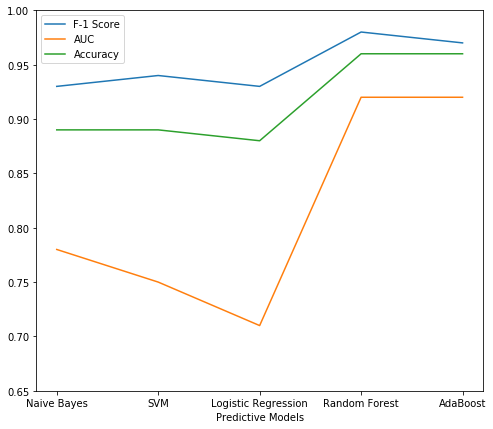

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(comp.Model, comp['F-1 Score'])
plt.plot(comp.Model, comp.AUC)
plt.plot(comp.Model, comp.Accuracy)
plt.legend(['F-1 Score', 'AUC', 'Accuracy'])
plt.xlabel("Predictive Models")
plt.ylim(0.65,1)